<a href="https://colab.research.google.com/github/mohadesehazari98/Quantum_Library/blob/main/Xanadu/Copy_Cat_Qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.8.10


In [ ]:
#...Installation...#
!pip install strawberryfields --upgrade

In [ ]:
#...IMPORTING LIBRARIES...#

import numpy as np
import math as math
import strawberryfields as sf 
from strawberryfields.ops import *
from strawberryfields.apps import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpmath import *

In the paper [Reference](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.68.042319?casa_token=u1SaMhcSnmwAAAAA%3AiabyBitCd4es2kv31DOh7UtyfuQPaa26Azf0_p7omlioX0ANoqikg5WLSZdW0IXTrJ6dMt0kKMU-) the squeezed state is represented as:
 **𝚿** 

we can have a corespondance between Landa and r which is  $λ = - e^{i\phi} tanh(r) $

lets first calculate the Mean Photon number for  $\lambda cos^2(\theta) = 0.4 $ and $λ = tanh(1.5)$ 

since tanh() and cos() functions has limitations, we cannot choose any values of r and θ that we want 

$r ≥ tanh^{-1}(K_{max})$

$θ ≤ cos^{-1}(\sqrt {K_{max}})$

$θ ≥ π - cos^{-1}(\sqrt {K_{max}})$

Also 

$ K_{max} ≤ 1 $

In [ ]:
k_max = 0.2e-6
#so by changing the k vector we can set appropriate values for θ

In [ ]:
r_limit = np.arctanh(k_max)
theta_limit_down = np.arccos(np.sqrt(k_max))
theta_limit_high = np.pi - np.arccos(np.sqrt(k_max))
print('r ≥', r_limit)
print('θ ≤', theta_limit_down)
print('θ ≥', theta_limit_high)

r ≥ 2.0000000000000266e-07
θ ≤ 1.5703491131844896
θ ≥ 1.5712435404053036


In [ ]:
#...SEED...#
np.random.seed(42)
phi_r = (np.pi)
phi_B = (np.pi)/2
# for λ = tanh(1.5) and k=0.4 and varying θ
theta = np.arccos(np.sqrt(0.4/np.tanh(1.5))) / 2

shots = 3500
modes_N = 2
m_range = 6

In [ ]:
#...TOKEN KEY...#

import xcc
settings = xcc.Settings(REFRESH_TOKEN="eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2NzE0ODg4OTQsImp0aSI6IjgwNWI1ZDMyLTRlOTAtNDdjOS04MzAyLWE5MjhlMjQ0ZmI3MSIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0ueGFuYWR1LmFpL2F1dGgvcmVhbG1zL3BsYXRmb3JtIiwiYXVkIjoiaHR0cHM6Ly9wbGF0Zm9ybS54YW5hZHUuYWkvYXV0aC9yZWFsbXMvcGxhdGZvcm0iLCJzdWIiOiI5YjVhYTExYS03NWY4LTQ0YTItYjkwZS1lZmRlZmM0YmRkOTciLCJ0eXAiOiJPZmZsaW5lIiwiYXpwIjoicHVibGljIiwic2Vzc2lvbl9zdGF0ZSI6IjgxMTYxMDJiLTljNjctNGY1ZC04MjdmLTYyYzNlM2NlODM5MyIsInNjb3BlIjoicHVibGljLXJvbGVzIHByb2ZpbGUgZW1haWwgb2ZmbGluZV9hY2Nlc3MiLCJzaWQiOiI4MTE2MTAyYi05YzY3LTRmNWQtODI3Zi02MmMzZTNjZTgzOTMifQ.ssX4d1H-WCJtYSMuUFH4WLJPLgz1HGaF3fZuvTs2UuE")
settings.save()

In [ ]:
import xcc

connection = xcc.Connection.load()
assert connection.ping().ok

In [ ]:
#...SETTING THE CIRCUIT/PROGRAM...#

program = sf.Program(modes_N)

In [ ]:
def first_circuit(m):
  #eng.reset()
  program = sf.Program(2)
  eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 30})

  with program.context as q:
    Sgate(1.5,phi_r) | q[0]
    Vac | q[1]
    BSgate(theta,phi_B) | (q[0], q[1])
    MeasureFock(select=m) | q[0]
    MeasureFock() | q[1]  

  #post selection 
  result = np.zeros((shots,2))
  for i in range(len(result)):
    out_result = eng.run(program)
    result[i,:] = out_result.samples

  vector = result[:,1]
  final_out = sum(vector) / shots
  return final_out

In [ ]:
#post selection 

mean_inside = np.zeros((m_range+2,1))
for m in range(m_range+2):
  mean_inside[m,0] = first_circuit(m)
  print(mean_inside[m,0])

0.02
1.0725714285714285
0.18685714285714286
1.2062857142857142
0.5422857142857143
1.4057142857142857
0.972
1.5691428571428572


In [ ]:
mean_inside = [0.02,1.0725714285714285,0.18685714285714286,1.2062857142857142,0.5422857142857143,1.4057142857142857,0.972,1.5691428571428572]
theta_D = (theta * 180) / (np.pi)
print("θ' =",theta_D,"θ =", 2*theta_D)
print('λ =', np.tanh(1.5))

θ' = 24.16773344800069 θ = 48.33546689600138
λ = 0.9051482536448664


for $ \lambda cos^2(\theta) = 0.4 $ and $ m = [0,1,2,3,4,5,6,7]$

*based on the graph the mean photon number increase as the m increase*

*why? _ Prove it!*

$U_{ab} |γ⟩_{a} |β⟩_{b} = |cos(θ/2) γ+isin(θ/2)β⟩|cos(θ/2) β+isin(θ/2)γ⟩$

$|γ⟩_{a} = |sq⟩ = \frac{1}{\sqrt{cosh(r)}} \sum_{n=0}^∞ \frac{\sqrt{(2n)!}}{2^n n!} (-e^{iϕ}tanh(r))^n |2n⟩ = ∑ f(n) |2n⟩ = f(0) |0⟩ + f(1) |2⟩+ f(2) |4⟩+...$

$|0⟩|0⟩ --- |0⟩|0⟩$

$|2⟩|0⟩ --- {|0⟩|2⟩,|1⟩|1⟩,|2⟩|0⟩}$

$|4⟩|0⟩ --- {|0⟩|4⟩,|1⟩|3⟩,|2⟩|2⟩,|3⟩|1⟩,|4⟩|0⟩}$

$|6⟩|0⟩ --- {|0⟩|6⟩,|1⟩|5⟩,|2⟩|4⟩,|3⟩|3⟩,|4⟩|2⟩,|5⟩|1⟩,|6⟩|0⟩}$

...

So you can see that the probability of detecting smaller m is higher, but once an m has been detected, higher m has higher mean photon number(since the sum is over ∞)

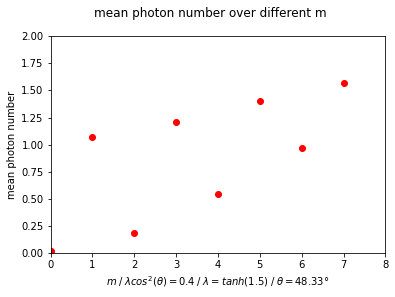

In [ ]:
m_axis = [0, 1, 2, 3, 4, 5, 6, 7]
plt.plot(m_axis, mean_inside, 'ro')
# naming the x axis
plt.xlabel(r'$m _ / _ \lambda cos^2(\theta)=0.4 _ / _ \lambda = tanh(1.5) _ / _ θ = 48.33° $')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0, 8, 0, 2])
plt.suptitle('mean photon number over different m ')
plt.show()



---



---



---



plot the Mean_Photon_Number over $\theta$ and m 

Also plot the Mean_Photon_Number over $\lambda$ and m 

$ \lambda cos^2(\theta) =  \bar{k} $

$ tanh(r) cos^2(2 \theta ') = \bar{k}$

$ \theta ' = (\cos^{-1} {\sqrt{\frac{k[i]}{tanh(r)}}} )/ 2$

$r = tanh^{-1}(\frac{k[i]}{cos^2(\theta)})$

* constant λ and varying θ | Set k=[0.01 : 0.99] | r = 2.7

In [ ]:
precision = 50
k = np.linspace(0.01, 0.99,precision)
r_set = 2.7
angles = np.zeros((len(k),1))
for i in range(len(k)):
  angles[i,0] = np.arccos(np.sqrt(k[i]/np.tanh(r_set))) / 2

In [ ]:
from scipy.stats import median_test
def run_circuit(r_squeezed,bs_angle,m):
  #eng.reset()
  program = sf.Program(2)
  eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 30})

  with program.context as q:
    Sgate(r_squeezed,phi_r) | q[0]
    # q1 is initialized in a vaccum state by default
    BSgate(bs_angle,phi_B) | (q[0], q[1])
    MeasureFock(select=m) | q[0]
    MeasureFock() | q[1]

  #post selection 
  result = np.zeros((shots,2))
  for i in range(len(result)):
    out_result = eng.run(program)
    result[i,:] = out_result.samples

  vector = result[:,1]
  final_out = sum(vector) / shots
  return final_out

In [ ]:
results = np.empty((shots, 2))
m_list =np.zeros((len(k),m_range))
# this loops evaluate all angles
for m in range(1,m_range+1):
  mean_photon_list = []
  for j in range(len(k)):
    # this loop runs the circuit `num_shots` times
    mean_output = run_circuit(r_set,angles[j,0],m)
    # here you get the maverage for both detectors
    mean_photon_list.append(mean_output)
    # replace this print statement by any postprocessing you'd to perform
  m_list[:,m-1] = mean_photon_list
  print(mean_photon_list)

[3.5485714285714285, 3.001714285714286, 2.621142857142857, 2.4737142857142858, 2.2954285714285714, 2.1674285714285713, 1.9794285714285715, 1.7697142857142858, 1.6228571428571428, 1.54, 1.448, 1.3422857142857143, 1.2617142857142858, 1.1554285714285715, 1.1131428571428572, 0.9994285714285714, 0.9662857142857143, 0.8714285714285714, 0.8171428571428572, 0.7502857142857143, 0.6988571428571428, 0.6291428571428571, 0.5645714285714286, 0.5657142857142857, 0.5331428571428571, 0.43657142857142855, 0.3914285714285714, 0.3657142857142857, 0.32457142857142857, 0.3068571428571429, 0.2725714285714286, 0.22914285714285715, 0.224, 0.18685714285714286, 0.15371428571428572, 0.12971428571428573, 0.11542857142857142, 0.116, 0.09028571428571429, 0.07657142857142857, 0.072, 0.045142857142857144, 0.03142857142857143, 0.02857142857142857, 0.017714285714285714, 0.011428571428571429, 0.006285714285714286, 0.001142857142857143, 0.0005714285714285715, 0.0]
[4.432571428571428, 3.9045714285714284, 3.5171428571428573

In [ ]:
#list has been copied from the printed result for saving processing time
m_list =np.zeros((len(k),m_range))
m_list[:,0] = [1.7394285714285713, 1.5942857142857143, 1.4708571428571429, 1.4805714285714286, 1.4154285714285715, 1.3954285714285715, 1.344, 1.2794285714285714, 1.2622857142857142, 1.248, 1.2302857142857142, 1.217142857142857, 1.2085714285714286, 1.1737142857142857, 1.1525714285714286, 1.1417142857142857, 1.144, 1.1222857142857143, 1.1062857142857143, 1.092, 1.0885714285714285, 1.0725714285714285, 1.0714285714285714, 1.0737142857142856, 1.0657142857142856, 1.0571428571428572, 1.0565714285714285, 1.0485714285714285, 1.0371428571428571, 1.0371428571428571, 1.0342857142857143, 1.0251428571428571, 1.024, 1.024, 1.018857142857143, 1.0165714285714287, 1.0137142857142858, 1.0142857142857142, 1.0102857142857142, 1.0085714285714287, 1.0102857142857142, 1.0074285714285713, 1.004, 1.002857142857143, 1.0022857142857142, 1.002857142857143, 1.0005714285714287, 1.0, 1.0, 1.0]
m_list[:,1] = [1.7702857142857142, 1.4982857142857142, 1.3394285714285714, 1.209142857142857, 1.0994285714285714, 0.9874285714285714, 0.9148571428571428, 0.7971428571428572, 0.7348571428571429, 0.6817142857142857, 0.6342857142857142, 0.5788571428571428, 0.5862857142857143, 0.49314285714285716, 0.46914285714285714, 0.444, 0.3914285714285714, 0.3822857142857143, 0.3325714285714286, 0.2988571428571429, 0.30228571428571427, 0.2382857142857143, 0.23714285714285716, 0.21828571428571428, 0.19657142857142856, 0.176, 0.16057142857142856, 0.13314285714285715, 0.12742857142857142, 0.12342857142857143, 0.09942857142857142, 0.08971428571428572, 0.08742857142857142, 0.068, 0.06, 0.04285714285714286, 0.044571428571428574, 0.04057142857142857, 0.027428571428571427, 0.026285714285714287, 0.016, 0.017142857142857144, 0.014285714285714285, 0.0074285714285714285, 0.006857142857142857, 0.001142857142857143, 0.0017142857142857142, 0.0, 0.0, 0.0]
m_list[:,2] = [2.9948571428571427, 2.6045714285714285, 2.372, 2.270857142857143, 2.0588571428571427, 1.9845714285714287, 1.9182857142857144, 1.82, 1.7611428571428571, 1.704, 1.604, 1.578857142857143, 1.5325714285714285, 1.4748571428571429, 1.4617142857142857, 1.4377142857142857, 1.3805714285714286, 1.3622857142857143, 1.3274285714285714, 1.2885714285714285, 1.2497142857142858, 1.229142857142857, 1.212, 1.1914285714285715, 1.1674285714285715, 1.161142857142857, 1.1765714285714286, 1.1377142857142857, 1.1177142857142857, 1.1074285714285714, 1.0902857142857143, 1.0805714285714285, 1.0834285714285714, 1.066857142857143, 1.0605714285714285, 1.054857142857143, 1.048, 1.0274285714285714, 1.0257142857142858, 1.024, 1.018857142857143, 1.0194285714285714, 1.0102857142857142, 1.0057142857142858, 1.0034285714285713, 1.0017142857142858, 1.0022857142857142, 1.0017142857142858, 1.0, 1.0]
m_list[:,3] = [3.5068571428571427, 3.0874285714285716, 2.7445714285714287, 2.4988571428571427, 2.2817142857142856, 2.1, 1.925142857142857, 1.7354285714285713, 1.6285714285714286, 1.5514285714285714, 1.4685714285714286, 1.352, 1.330857142857143, 1.1782857142857144, 1.124, 1.0474285714285714, 0.9457142857142857, 0.9114285714285715, 0.7914285714285715, 0.7468571428571429, 0.7177142857142857, 0.612, 0.5925714285714285, 0.5411428571428571, 0.5, 0.4491428571428571, 0.44342857142857145, 0.38, 0.3514285714285714, 0.3017142857142857, 0.24914285714285714, 0.23714285714285716, 0.21771428571428572, 0.18685714285714286, 0.152, 0.13142857142857142, 0.124, 0.11314285714285714, 0.07942857142857143, 0.06571428571428571, 0.04971428571428571, 0.048, 0.036571428571428574, 0.022285714285714287, 0.019428571428571427, 0.006285714285714286, 0.008571428571428572, 0.001142857142857143, 0.0, 0.0]
m_list[:,4] = [4.432571428571428, 3.9045714285714284, 3.5171428571428573, 3.257142857142857, 3.0285714285714285, 2.832, 2.677714285714286, 2.4634285714285715, 2.354285714285714, 2.245142857142857, 2.181142857142857, 2.065142857142857, 2.0605714285714285, 1.9234285714285715, 1.876, 1.7982857142857143, 1.7108571428571429, 1.676, 1.6171428571428572, 1.5445714285714285, 1.5342857142857143, 1.4417142857142857, 1.4314285714285715, 1.38, 1.3594285714285714, 1.3285714285714285, 1.3177142857142856, 1.2571428571428571, 1.232, 1.2005714285714286, 1.1645714285714286, 1.1674285714285715, 1.1582857142857144, 1.1268571428571428, 1.1062857142857143, 1.0874285714285714, 1.084, 1.0731428571428572, 1.0502857142857143, 1.0485714285714285, 1.0314285714285714, 1.0302857142857142, 1.0251428571428571, 1.0142857142857142, 1.0125714285714287, 1.0034285714285713, 1.0045714285714287, 1.0, 1.0, 1.0]
m_list[:,5] = [5.249142857142857, 4.4874285714285715, 3.9937142857142858, 3.7657142857142856, 3.3754285714285714, 3.1222857142857143, 2.9691428571428573, 2.728, 2.5782857142857143, 2.4194285714285715, 2.244, 2.1485714285714286, 2.0171428571428573, 1.852, 1.7622857142857142, 1.7, 1.5697142857142856, 1.4897142857142858, 1.3954285714285715, 1.278857142857143, 1.164, 1.1022857142857143, 1.006857142857143, 0.9337142857142857, 0.864, 0.7868571428571428, 0.7634285714285715, 0.6862857142857143, 0.604, 0.5571428571428572, 0.4897142857142857, 0.43942857142857145, 0.4125714285714286, 0.36742857142857144, 0.3182857142857143, 0.2737142857142857, 0.244, 0.18228571428571427, 0.14914285714285713, 0.11657142857142858, 0.10514285714285715, 0.08685714285714285, 0.06342857142857143, 0.044571428571428574, 0.03485714285714286, 0.017142857142857144, 0.012571428571428572, 0.006857142857142857, 0.0005714285714285715, 0.0]

angles_D = (angles * 180) / (np.pi)
print("In degree: ","θ' = [",angles_D[0,0] ,":",angles_D[precision-1,0],"]","θ = [",2*angles_D[0,0] ,":",2*angles_D[precision-1,0],"]")
print('λ =', np.tanh(2.7))

In degree:  θ' = [ 42.117380726640775 : 0.9135668468406252 ] θ = [ 84.23476145328155 : 1.8271336936812503 ]
λ = 0.9910074536781176


$ <n> mean-photon-number $

*Why the mean photon number is decreasing over higher θ*

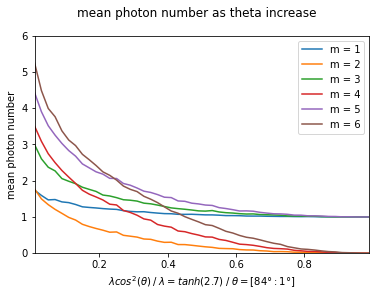

In [ ]:
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = tanh(2.7) _ / _ θ = [84°:1°] $')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0.01, 0.99, 0, 6])
plt.suptitle('mean photon number as theta increase')
plt.show()



---



---



---



---



* constant θ and varying λ 
  * θ $ \approx$ 0 | Set k=[0.01 : 0.99] | θ = 0.1

In [ ]:
def find_radius(precision,k_lower,k_upper,theta_set):
  k = np.linspace(k_lower, k_upper, precision)
  radius = np.zeros((len(k),1))
  for i in range(len(k)):
    radius[i,0] = np.arctanh(k[i]/np.power(np.cos(theta_set),2))
  return radius,len(k)

In [ ]:
k_upper = 0.99
precision = 50
theta_set = 0.1
[radius,Len_k] = find_radius(precision,k_upper,theta_set)

go to cell 10

In [ ]:
results = np.empty((shots, 2))
m_list =np.zeros((Len_k,m_range))
# this loops evaluate all angles
for m in range(1,m_range+1):
  mean_photon_list = []
  for j in range(Len_k):
    # this loop runs the circuit `num_shots` times
    mean_output = run_circuit(radius[j,0],theta_set/2,m)
    # here you get the maverage for both detectors
    mean_photon_list.append(mean_output)
    # replace this print statement by any postprocessing you'd to perform
  m_list[:,m-1] = mean_photon_list
  print(mean_photon_list)

[1.0177142857142858, 1.02, 1.0194285714285714, 1.034857142857143, 1.0434285714285714, 1.0525714285714285, 1.058857142857143, 1.0571428571428572, 1.062857142857143, 1.0725714285714285, 1.082857142857143, 1.0914285714285714, 1.112, 1.0994285714285714, 1.1125714285714285, 1.1268571428571428, 1.1468571428571428, 1.1531428571428572, 1.156, 1.1817142857142857, 1.1857142857142857, 1.208, 1.2097142857142857, 1.2611428571428571, 1.2742857142857142, 1.272, 1.2845714285714285, 1.3102857142857143, 1.3211428571428572, 1.368, 1.3834285714285715, 1.4068571428571428, 1.4382857142857144, 1.4548571428571428, 1.4714285714285715, 1.4605714285714286, 1.5365714285714285, 1.5965714285714285, 1.6051428571428572, 1.6422857142857143, 1.697142857142857, 1.724, 1.7337142857142858, 1.7605714285714287, 1.8131428571428572, 1.8422857142857143, 1.8805714285714286, 1.896, 1.9394285714285715, 1.9954285714285713]
[0.061714285714285715, 0.07371428571428572, 0.08628571428571429, 0.10228571428571429, 0.11714285714285715, 0.

In [ ]:
#list has been copied from the printed result for processing time saving
m_list =np.zeros((len(k),m_range))
m_list[:,0] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
m_list[:,1] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0]
m_list[:,2] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0005714285714287, 1.0, 1.0, 1.0, 1.0005714285714287, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
m_list[:,3] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_list[:,4] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0005714285714287, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
m_list[:,5] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001142857142857143, 0.0, 0.0005714285714285715, 0.0005714285714285715, 0.0005714285714285715, 0.0, 0.0, 0.0]
theta_D = (0.1 * 180) / (np.pi)
print("In degree: ","θ' = ",theta_D/2,"θ = ", theta_D)
print("r = [",radius[0,0] ,":",radius[precision-1,0],"]")
print("λ = [",np.tanh(radius[0,0]) ,":",np.tanh(radius[precision-1,0]),"]")

In degree:  θ' =  2.864788975654116 θ =  5.729577951308232
r = [ 0.01010101398731892 : 5.49669979378917 ]
λ = [ 0.010100670464224946 : 0.9999663759582699 ]


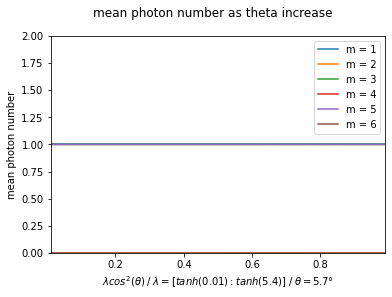

In [ ]:
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = [tanh(0.01) : tanh(5.4)] _ / _ θ = 5.7°$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0.01, 0.99, 0, 2])
plt.suptitle('mean photon number as theta increase')
plt.show()



---



---



---



---



* constant θ and varying λ 
  * θ $ \approx $ π/3 | Set k=[0.1e-6 : 0.1312] | θ = 1.2

In [ ]:
k_upper = 0.1312
k_lower = 0.1e-6
precision = 50
theta_set = 1.2
[radius,Len_k] = find_radius(precision,k_lower,k_upper,theta_set)

In [ ]:
#list has been copied from the printed result for processing time saving 
m_list =np.zeros((Len_k,m_range))
m_list[:,0] = [1.0, 1.0, 1.0, 1.0005714285714287, 1.0022857142857142, 1.002857142857143, 1.004, 1.008, 1.0091428571428571, 1.0074285714285713, 1.0085714285714287, 1.018857142857143, 1.0251428571428571, 1.0177142857142858, 1.022857142857143, 1.0245714285714285, 1.0371428571428571, 1.0325714285714285, 1.0342857142857143, 1.0417142857142858, 1.0502857142857143, 1.0525714285714285, 1.054857142857143, 1.0674285714285714, 1.0765714285714285, 1.076, 1.088, 1.0982857142857143, 1.0971428571428572, 1.1017142857142856, 1.1148571428571428, 1.1211428571428572, 1.1377142857142857, 1.1411428571428572, 1.1417142857142857, 1.1502857142857144, 1.1702857142857144, 1.1994285714285715, 1.201142857142857, 1.212, 1.2342857142857142, 1.2457142857142858, 1.24, 1.266857142857143, 1.2662857142857142, 1.2822857142857143, 1.3114285714285714, 1.314857142857143, 1.318857142857143, 1.3422857142857143]
m_list[:,1] = [0.0, 0.0005714285714285715, 0.0017142857142857142, 0.002857142857142857, 0.004571428571428572, 0.006857142857142857, 0.017142857142857144, 0.018857142857142857, 0.02457142857142857, 0.026857142857142857, 0.03542857142857143, 0.038285714285714284, 0.06514285714285714, 0.062285714285714285, 0.08171428571428571, 0.09085714285714286, 0.10114285714285715, 0.12685714285714286, 0.12857142857142856, 0.13714285714285715, 0.16285714285714287, 0.15485714285714286, 0.18914285714285714, 0.2017142857142857, 0.22285714285714286, 0.24, 0.276, 0.272, 0.29714285714285715, 0.3182857142857143, 0.32171428571428573, 0.3462857142857143, 0.384, 0.3862857142857143, 0.42457142857142854, 0.452, 0.47828571428571426, 0.54, 0.536, 0.5611428571428572, 0.576, 0.6308571428571429, 0.6468571428571429, 0.6954285714285714, 0.7445714285714286, 0.7571428571428571, 0.8148571428571428, 0.8051428571428572, 0.8405714285714285, 0.8982857142857142]
m_list[:,2] = [1.0, 1.0, 1.0, 1.0022857142857142, 1.0057142857142858, 1.0097142857142858, 1.0137142857142858, 1.0194285714285714, 1.0205714285714285, 1.0245714285714285, 1.0314285714285714, 1.0434285714285714, 1.0382857142857143, 1.0582857142857143, 1.0691428571428572, 1.0948571428571428, 1.096, 1.1034285714285714, 1.1228571428571428, 1.1222857142857143, 1.1211428571428572, 1.1451428571428572, 1.1685714285714286, 1.18, 1.188, 1.2142857142857142, 1.268, 1.2622857142857142, 1.284, 1.3, 1.3222857142857143, 1.3468571428571428, 1.3874285714285715, 1.4217142857142857, 1.437142857142857, 1.4702857142857142, 1.4857142857142858, 1.4788571428571429, 1.4994285714285713, 1.5451428571428572, 1.612, 1.648, 1.6628571428571428, 1.668, 1.716, 1.7337142857142858, 1.8022857142857143, 1.830857142857143, 1.8594285714285714, 1.924]
m_list[:,3] = [0.0, 0.001142857142857143, 0.004571428571428572, 0.014857142857142857, 0.01657142857142857, 0.02857142857142857, 0.03257142857142857, 0.048, 0.06285714285714286, 0.088, 0.11371428571428571, 0.16114285714285714, 0.1377142857142857, 0.16285714285714287, 0.21885714285714286, 0.24971428571428572, 0.2542857142857143, 0.26285714285714284, 0.3142857142857143, 0.3302857142857143, 0.4074285714285714, 0.41828571428571426, 0.4817142857142857, 0.47885714285714287, 0.5474285714285714, 0.6011428571428571, 0.6325714285714286, 0.6794285714285714, 0.7405714285714285, 0.8211428571428572, 0.8514285714285714, 0.8674285714285714, 0.9325714285714286, 1.0131428571428571, 1.0462857142857143, 1.1005714285714285, 1.1468571428571428, 1.165142857142857, 1.2777142857142858, 1.286857142857143, 1.4114285714285715, 1.417142857142857, 1.504, 1.5982857142857143, 1.616, 1.704, 1.8274285714285714, 1.8668571428571428, 1.8685714285714285, 1.9297142857142857]
m_list[:,4] = [1.0, 1.0005714285714287, 1.0011428571428571, 1.0057142857142858, 1.0091428571428571, 1.0182857142857142, 1.0205714285714285, 1.0405714285714285, 1.0474285714285714, 1.0577142857142856, 1.0731428571428572, 1.0851428571428572, 1.1028571428571428, 1.1177142857142857, 1.1125714285714285, 1.1537142857142857, 1.1885714285714286, 1.205142857142857, 1.2137142857142857, 1.2554285714285713, 1.2685714285714285, 1.3062857142857143, 1.3445714285714285, 1.3714285714285714, 1.3828571428571428, 1.4548571428571428, 1.4485714285714286, 1.488, 1.5291428571428571, 1.5948571428571428, 1.628, 1.6834285714285715, 1.713142857142857, 1.7782857142857142, 1.8062857142857143, 1.8062857142857143, 1.9051428571428572, 1.9885714285714287, 1.9765714285714286, 2.068, 2.109714285714286, 2.1662857142857144, 2.305142857142857, 2.337142857142857, 2.346285714285714, 2.4874285714285715, 2.4834285714285715, 2.5268571428571427, 2.626857142857143, 2.673714285714286]
m_list[:,5] = [0.0, 0.0017142857142857142, 0.010285714285714285, 0.017142857142857144, 0.03142857142857143, 0.054857142857142854, 0.08914285714285715, 0.10114285714285715, 0.12, 0.16285714285714287, 0.16685714285714287, 0.25885714285714284, 0.2674285714285714, 0.34285714285714286, 0.3742857142857143, 0.4097142857142857, 0.5045714285714286, 0.5057142857142857, 0.5885714285714285, 0.6354285714285715, 0.6954285714285714, 0.764, 0.8451428571428572, 0.8914285714285715, 0.9657142857142857, 1.048, 1.0925714285714285, 1.1571428571428573, 1.2531428571428571, 1.3314285714285714, 1.3617142857142857, 1.4737142857142858, 1.5497142857142858, 1.6165714285714285, 1.756, 1.828, 1.826857142857143, 1.9434285714285715, 2.0194285714285716, 2.121714285714286, 2.168, 2.270857142857143, 2.3325714285714287, 2.4394285714285715, 2.4617142857142857, 2.6314285714285712, 2.672, 2.837142857142857, 2.858857142857143, 2.9908571428571427]
theta_D = (theta_set * 180) / (np.pi)
print("In degree: ","θ' = ",theta_D/2,"θ = ", theta_D)
print("r = [",radius[0,0] ,":",radius[precision-1,0],"]")
print("λ = [",np.tanh(radius[0,0]) ,":",np.tanh(radius[precision-1,0]),"]")

In degree:  θ' =  34.37746770784939 θ =  68.75493541569878
r = [ 7.615963967208525e-07 : 3.9209547139454055 ]
λ = [ 7.615963967207053e-07 : 0.9992144724975653 ]


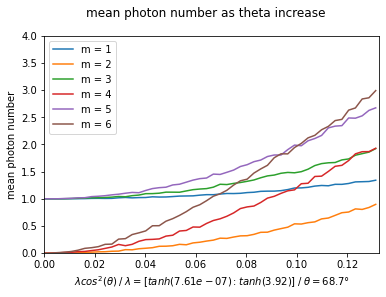

In [ ]:
k = np.linspace(k_lower, k_upper, precision)
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = [tanh(7.61e-07) : tanh(3.92)] _ / _ θ = 68.7°$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0, 0.1325, 0, 4])
plt.suptitle('mean photon number as theta increase')
plt.show()

---



---



---



---



* constant θ and varying λ 
  * θ $ \approx $ π/2 | Set k=[0.1e-6 : 6.34e-7] | θ = 1.57

In [ ]:
k_upper = 6.34e-7
k_lower = 0.1e-6
precision = 50
theta_set = 1.57
[radius,Len_k] = find_radius(precision,k_lower,k_upper,theta_set)

In [ ]:
#list has been copied from the printed result for processing time saving 
m_list =np.zeros((Len_k,m_range))
m_list[:,0] = [1.0177142857142858, 1.02, 1.0194285714285714, 1.034857142857143, 1.0434285714285714, 1.0525714285714285, 1.058857142857143, 1.0571428571428572, 1.062857142857143, 1.0725714285714285, 1.082857142857143, 1.0914285714285714, 1.112, 1.0994285714285714, 1.1125714285714285, 1.1268571428571428, 1.1468571428571428, 1.1531428571428572, 1.156, 1.1817142857142857, 1.1857142857142857, 1.208, 1.2097142857142857, 1.2611428571428571, 1.2742857142857142, 1.272, 1.2845714285714285, 1.3102857142857143, 1.3211428571428572, 1.368, 1.3834285714285715, 1.4068571428571428, 1.4382857142857144, 1.4548571428571428, 1.4714285714285715, 1.4605714285714286, 1.5365714285714285, 1.5965714285714285, 1.6051428571428572, 1.6422857142857143, 1.697142857142857, 1.724, 1.7337142857142858, 1.7605714285714287, 1.8131428571428572, 1.8422857142857143, 1.8805714285714286, 1.896, 1.9394285714285715, 1.9954285714285713]
m_list[:,1] = [0.061714285714285715, 0.07371428571428572, 0.08628571428571429, 0.10228571428571429, 0.11714285714285715, 0.14342857142857143, 0.15885714285714286, 0.16057142857142856, 0.18342857142857144, 0.204, 0.24742857142857144, 0.26914285714285713, 0.32457142857142857, 0.3302857142857143, 0.3657142857142857, 0.4022857142857143, 0.41485714285714287, 0.47314285714285714, 0.4897142857142857, 0.5022857142857143, 0.5851428571428572, 0.5657142857142857, 0.6371428571428571, 0.6885714285714286, 0.7245714285714285, 0.76, 0.84, 0.86, 0.9171428571428571, 0.9828571428571429, 0.9794285714285714, 1.0617142857142856, 1.1125714285714285, 1.1777142857142857, 1.221142857142857, 1.2914285714285714, 1.3285714285714285, 1.3971428571428572, 1.46, 1.5022857142857142, 1.5537142857142856, 1.6874285714285715, 1.782857142857143, 1.8005714285714285, 1.9628571428571429, 1.964, 2.0828571428571427, 2.105142857142857, 2.201142857142857, 2.313142857142857]
m_list[:,2] = [1.0525714285714285, 1.062857142857143, 1.0822857142857143, 1.0937142857142856, 1.1074285714285714, 1.1228571428571428, 1.1394285714285715, 1.1697142857142857, 1.192, 1.209142857142857, 1.2062857142857142, 1.2537142857142858, 1.272, 1.2925714285714285, 1.3451428571428572, 1.3925714285714286, 1.4074285714285715, 1.444, 1.4794285714285715, 1.4977142857142858, 1.5302857142857142, 1.5611428571428572, 1.628, 1.656, 1.6845714285714286, 1.7468571428571429, 1.8634285714285714, 1.8868571428571428, 1.9234285714285715, 1.9714285714285715, 2.0062857142857142, 2.1085714285714285, 2.165142857142857, 2.250857142857143, 2.3114285714285714, 2.36, 2.4834285714285715, 2.492, 2.52, 2.6205714285714286, 2.761142857142857, 2.8617142857142857, 2.912, 2.946285714285714, 3.0685714285714285, 3.1285714285714286, 3.3062857142857145, 3.398857142857143, 3.472, 3.62]
m_list[:,3] = [0.14857142857142858, 0.20457142857142857, 0.24057142857142857, 0.28285714285714286, 0.29428571428571426, 0.3514285714285714, 0.38685714285714284, 0.444, 0.488, 0.5554285714285714, 0.6211428571428571, 0.7011428571428572, 0.7068571428571429, 0.784, 0.8857142857142857, 0.952, 0.9622857142857143, 1.048, 1.1634285714285715, 1.188, 1.3137142857142856, 1.3537142857142856, 1.4497142857142857, 1.5017142857142858, 1.612, 1.7108571428571429, 1.762857142857143, 1.8537142857142856, 1.9577142857142857, 2.1222857142857143, 2.184, 2.2314285714285713, 2.350285714285714, 2.536, 2.556, 2.676, 2.761142857142857, 2.826857142857143, 3.0034285714285716, 3.0554285714285716, 3.2954285714285714, 3.3314285714285714, 3.478285714285714, 3.6725714285714286, 3.734857142857143, 3.902285714285714, 4.143428571428571, 4.2217142857142855, 4.292, 4.441142857142857]
m_list[:,4] = [1.1148571428571428, 1.1177142857142857, 1.1485714285714286, 1.1822857142857144, 1.2045714285714286, 1.2428571428571429, 1.2725714285714285, 1.3297142857142856, 1.3554285714285714, 1.3857142857142857, 1.437142857142857, 1.4834285714285713, 1.5554285714285714, 1.6062857142857143, 1.6325714285714286, 1.6942857142857144, 1.8005714285714285, 1.828, 1.8851428571428572, 1.977142857142857, 2.029714285714286, 2.0902857142857143, 2.212, 2.2697142857142856, 2.330285714285714, 2.442285714285714, 2.494285714285714, 2.5634285714285716, 2.6782857142857144, 2.836, 2.918857142857143, 3.012, 3.117714285714286, 3.2325714285714287, 3.3274285714285714, 3.358857142857143, 3.5542857142857143, 3.7497142857142856, 3.7977142857142856, 3.962285714285714, 4.069714285714285, 4.2051428571428575, 4.4714285714285715, 4.582285714285714, 4.672571428571429, 4.924571428571428, 4.977714285714286, 5.113142857142857, 5.353714285714286, 5.504]
m_list[:,5] = [0.27485714285714286, 0.3497142857142857, 0.42, 0.5045714285714286, 0.5645714285714286, 0.6611428571428571, 0.7388571428571429, 0.8211428571428572, 0.8748571428571429, 0.9668571428571429, 0.98, 1.1834285714285715, 1.2405714285714287, 1.3662857142857143, 1.433142857142857, 1.5131428571428571, 1.701142857142857, 1.689142857142857, 1.848, 1.9314285714285715, 2.021714285714286, 2.1285714285714286, 2.292, 2.370857142857143, 2.5028571428571427, 2.6645714285714286, 2.7337142857142855, 2.838285714285714, 3.017714285714286, 3.129142857142857, 3.2337142857142855, 3.406857142857143, 3.5554285714285716, 3.6725714285714286, 3.8897142857142857, 4.038857142857143, 4.069714285714285, 4.263428571428571, 4.401714285714286, 4.615428571428572, 4.706285714285714, 4.927428571428571, 5.0525714285714285, 5.296, 5.3502857142857145, 5.661142857142857, 5.798857142857143, 6.126857142857143, 6.1897142857142855, 6.503428571428572]
theta_D = (theta_set * 180) / (np.pi)
print("In degree: ","θ' = ",theta_D/2,"θ = ", theta_D)
print("r = [",radius[0,0] ,":",radius[precision-1,0],"]")
print("λ = [",np.tanh(radius[0,0]) ,":",np.tanh(radius[precision-1,0]),"]")

In degree:  θ' =  44.97718691776963 θ =  89.95437383553926
r = [ 0.15902184597403873 : 4.569356271661388 ]
λ = [ 0.15769482207973276 : 0.999785171985506 ]


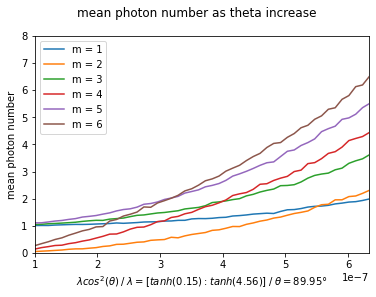

In [ ]:
k = np.linspace(k_lower, k_upper, precision)
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = [tanh(0.15) : tanh(4.56)] _ / _ θ = 89.95°$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([k_lower, k_upper, 0, 8])
plt.suptitle('mean photon number as theta increase')
plt.show()



---



---

**Math**

${\displaystyle \langle n^{̄}\rangle } = \frac{1}{N_m} Σ_n n c_{n,m}^2 |λ cos^2(θ) / 2|^{n+m}$

$N_m = 𝛴_n \space c_{n,m}^2 \space |λ cos^2(θ) / 2|^{n+m}$

$c_{n,m} = (n+m)! \space [1 + (-1)^{n+m}] \space / \space [\sqrt{n!} \space  Γ{(\frac{n+m}{2} + 1)}]$

$ 𝚪(n) = (n-1)! $


In [ ]:
def c_nm(n,m):
  c_n_m_out = ( math.factorial(int(n)+m) ) * ( 1 + math.pow(-1,n+m) ) / ( math.sqrt(math.factorial(int(n))) * math.gamma(((int(n)+m)/2)+1) )
  return c_n_m_out

In [ ]:
def N_m(m,k):
  N_m_out = nsum(lambda n: ( math.pow(c_nm(n,m),2) * (math.pow(abs(k/2),(n+m))) ), [0, 100])
  return N_m_out

In [ ]:
def Av_n(m,k):
  Av_n_out = ( 1 / N_m(m,k) ) * nsum(lambda n: ( n * math.pow(c_nm(n,m),2) * math.pow(abs(k/2),(n+m)) ), [0, 100])
  return Av_n_out

In [ ]:
def for_k(m):
  k = np.linspace(0.1e-20, 1, 100)
  out = zeros(1,len(k))
  for j in range(len(k)):
    out[0,j] = Av_n(m,k[j])
  return out

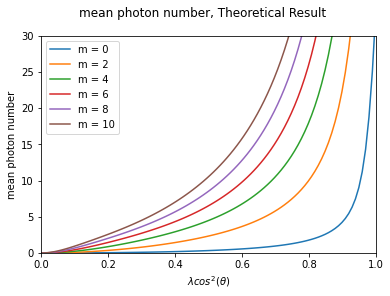

In [ ]:
k = np.linspace(0.1e-50, 1, 100)
plt.plot(k, for_k(0), label = "m = 0") #m=0
plt.plot(k, for_k(2), label = "m = 2") #m=2
plt.plot(k, for_k(4), label = "m = 4") #m=4
plt.plot(k, for_k(6), label = "m = 6") #m=6
plt.plot(k, for_k(8), label = "m = 8") #m=8
plt.plot(k, for_k(10), label = "m = 10") #m=10
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta)$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0, 1, 0, 30])
plt.suptitle('mean photon number, Theoretical Result')
plt.show()